In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
troll = pd.read_csv(r'F:\Data Analysis\Dataset\tweets.csv')

In [3]:
troll.head(5)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


## 1. Explore missing values and do some data preprocessing

In [4]:
troll.shape

(203482, 16)

In [5]:
troll.isnull().sum().sort_values(ascending=False)

in_reply_to_status_id    202923
retweeted_status_id      163831
retweet_count            145399
retweeted                145399
favorite_count           145399
source                   145398
user_id                    8065
tweet_id                   2314
created_at                   21
created_str                  21
text                         21
user_key                      0
hashtags                      0
expanded_urls                 0
posted                        0
mentions                      0
dtype: int64

In [6]:
troll['created_str'] = pd.to_datetime(troll['created_str'])

In [7]:
troll['created_str'].dtype

dtype('<M8[ns]')

## 1. Find period of tweets this data captures.
## 2. Understand trend of tweet counts by date.

In [8]:
troll['created_str'].min()

Timestamp('2014-07-14 18:04:55')

In [9]:
troll['created_str'].max()

Timestamp('2017-09-26 09:05:32')

In [10]:
troll['created_str_date']=troll['created_str'].dt.date

In [11]:
troll['created_str_date']

0         2016-03-22
1         2016-10-10
2         2017-02-22
3         2016-12-26
4         2017-08-06
             ...    
203477    2016-11-01
203478    2015-06-18
203479    2017-01-10
203480    2016-11-20
203481    2016-12-19
Name: created_str_date, Length: 203482, dtype: object

In [12]:
troll['created_str']

0        2016-03-22 18:31:42
1        2016-10-10 20:57:00
2        2017-02-22 12:43:43
3        2016-12-26 15:06:41
4        2017-08-06 02:36:24
                 ...        
203477   2016-11-01 12:13:06
203478   2015-06-18 01:04:35
203479   2017-01-10 18:50:48
203480   2016-11-20 21:49:07
203481   2016-12-19 23:00:17
Name: created_str, Length: 203482, dtype: datetime64[ns]

In [13]:
tweet_trend = pd.value_counts(troll['created_str_date']).to_frame()

In [14]:
tweet_trend.columns=['tweets_count']

In [15]:
tweet_trend.sort_index(ascending=True,inplace=True)

Text(0, 0.5, 'Tweet count')

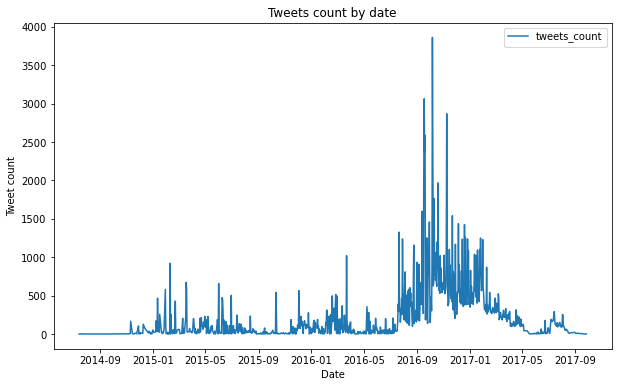

In [16]:
tweet_trend.plot(figsize=(10,6))
plt.title('Tweets count by date')
plt.xlabel('Date')
plt.ylabel('Tweet count')

## 1. Analyze if the tweets really had to impact the way of us election or not.

In [17]:
dates_list = ['2015-06-16','2015-12-07','2016-02-01',
              '2016-03-01','2016-03-03','2016-03-11',
              '2016-05-03','2016-05-26','2016-06-20',
              '2016-07-15','2016-07-21','2016-08-17',
              '2016-09-01','2016-10-07','2016-11-08']
important_dates = pd.Series(dates_list)
important_dates

0     2015-06-16
1     2015-12-07
2     2016-02-01
3     2016-03-01
4     2016-03-03
5     2016-03-11
6     2016-05-03
7     2016-05-26
8     2016-06-20
9     2016-07-15
10    2016-07-21
11    2016-08-17
12    2016-09-01
13    2016-10-07
14    2016-11-08
dtype: object

In [18]:
data = tweet_trend.copy()

In [19]:
data

,tweets_count
2014-07-14,1
2014-07-17,1
2014-07-20,2
2014-07-22,3
2014-07-23,1
...,...
2017-09-10,7
2017-09-16,6
2017-09-19,1
2017-09-24,1


In [20]:
data['Important Events'] = False

In [21]:
data

,tweets_count,Important Events
2014-07-14,1,False
2014-07-17,1,False
2014-07-20,2,False
2014-07-22,3,False
2014-07-23,1,False
...,...,...
2017-09-10,7,False
2017-09-16,6,False
2017-09-19,1,False
2017-09-24,1,False


In [22]:
data = data.reset_index().rename(columns={'index':'date'})

In [23]:
data

,date,tweets_count,Important Events
0,2014-07-14,1,False
1,2014-07-17,1,False
2,2014-07-20,2,False
3,2014-07-22,3,False
4,2014-07-23,1,False
...,...,...,...
925,2017-09-10,7,False
926,2017-09-16,6,False
927,2017-09-19,1,False
928,2017-09-24,1,False


In [24]:
data['date'].isin(important_dates).unique()

array([False])

In [25]:
data['date'][0]

datetime.date(2014, 7, 14)

In [26]:
type(data['date'][0])

datetime.date

In [27]:
important_dates[0]

'2015-06-16'

In [28]:
type(important_dates[0])

str

In [29]:
data['date']=data['date'].apply(lambda x:x.strftime('%Y-%m-%d'))

In [30]:
data['date']

0      2014-07-14
1      2014-07-17
2      2014-07-20
3      2014-07-22
4      2014-07-23
          ...    
925    2017-09-10
926    2017-09-16
927    2017-09-19
928    2017-09-24
929    2017-09-26
Name: date, Length: 930, dtype: object

In [31]:
data['date'][0]

'2014-07-14'

In [32]:
type(data['date'][0])

str

In [33]:
data['date'].isin(important_dates).unique()

array([False,  True])

In [34]:
data[data['date'].isin(important_dates)]

,date,tweets_count,Important Events
170,2015-06-16,3,False
331,2015-12-07,219,False
382,2016-02-01,18,False
409,2016-03-01,143,False
411,2016-03-03,6,False
419,2016-03-11,64,False
467,2016-05-03,38,False
487,2016-05-26,6,False
511,2016-06-20,201,False
536,2016-07-15,47,False


In [35]:
data['Important Events'] = np.where(data['date'].isin(important_dates),True,False)

In [36]:
data[data['Important Events']==True]

,date,tweets_count,Important Events
170,2015-06-16,3,True
331,2015-12-07,219,True
382,2016-02-01,18,True
409,2016-03-01,143,True
411,2016-03-03,6,True
419,2016-03-11,64,True
467,2016-05-03,38,True
487,2016-05-26,6,True
511,2016-06-20,201,True
536,2016-07-15,47,True


In [108]:
data

,date,tweets_count,Important Events,Values,pct_change
0,2014-07-14,1,False,0,NaN
1,2014-07-17,1,False,0,0.000000
2,2014-07-20,2,False,0,100.000000
3,2014-07-22,3,False,0,50.000000
4,2014-07-23,1,False,0,-66.666667
...,...,...,...,...,...
925,2017-09-10,7,False,0,-36.363636
926,2017-09-16,6,False,0,-14.285714
927,2017-09-19,1,False,0,-83.333333
928,2017-09-24,1,False,0,0.000000


In [41]:
data['Values']=np.where(data['date'].isin(important_dates),1,0)

In [43]:
data.head(5)

,date,tweets_count,Important Events,Values
0,2014-07-14,1,False,0
1,2014-07-17,1,False,0
2,2014-07-20,2,False,0
3,2014-07-22,3,False,0
4,2014-07-23,1,False,0


<AxesSubplot:>

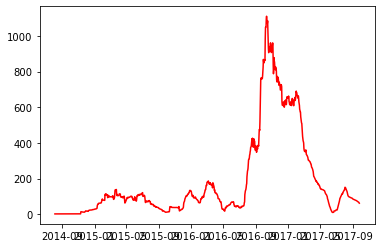

In [55]:
tweet_trend['tweets_count'].rolling(window=30,min_periods=10).mean().plot(c='Red')

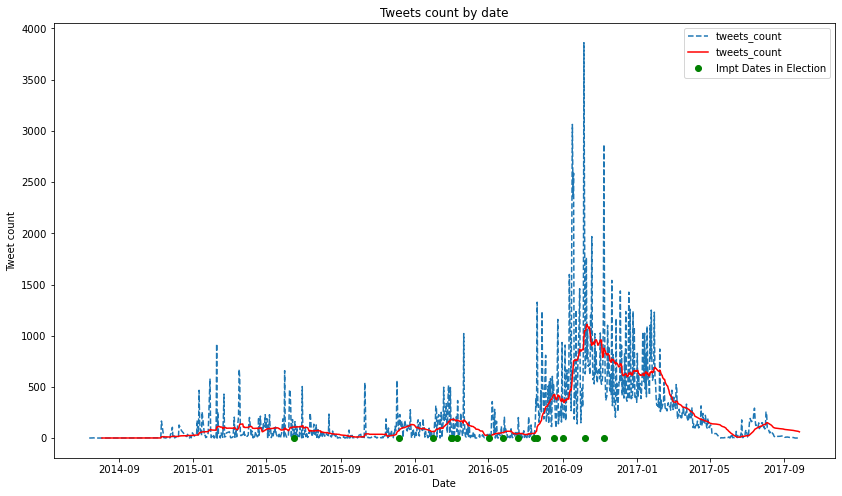

In [100]:
tweet_trend['tweets_count'].plot(linestyle='--',figsize=(14,8))
plt.title('Tweets count by date')
plt.xlabel('Date')
plt.ylabel('Tweet count')

tweet_trend['tweets_count'].rolling(window=30,min_periods=10).mean().plot(c='Red')

plt.plot(pd.to_datetime(data[filt]['date'].values),data[filt]['Values'].values,c='g',marker='o',linestyle='None',label='Impt Dates in Election')

plt.legend()

In [62]:
filt = data['Important Events']==True

In [63]:
filt

0      False
1      False
2      False
3      False
4      False
       ...  
925    False
926    False
927    False
928    False
929    False
Name: Important Events, Length: 930, dtype: bool

In [65]:
data[filt]

,date,tweets_count,Important Events,Values
170,2015-06-16,3,True,1
331,2015-12-07,219,True,1
382,2016-02-01,18,True,1
409,2016-03-01,143,True,1
411,2016-03-03,6,True,1
419,2016-03-11,64,True,1
467,2016-05-03,38,True,1
487,2016-05-26,6,True,1
511,2016-06-20,201,True,1
536,2016-07-15,47,True,1


In [74]:
pd.to_datetime(data[filt]['date'].values)

DatetimeIndex(['2015-06-16', '2015-12-07', '2016-02-01', '2016-03-01',
               '2016-03-03', '2016-03-11', '2016-05-03', '2016-05-26',
               '2016-06-20', '2016-07-15', '2016-07-21', '2016-08-17',
               '2016-09-01', '2016-10-07', '2016-11-08'],
              dtype='datetime64[ns]', freq=None)

In [81]:
data[filt]['Values'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## 1. Let's analyze the percentage change in tweet counts bwteen subsequent dates and then see if an important date relates to a spike or not.

In [105]:
data['tweets_count']

0      1
1      1
2      2
3      3
4      1
      ..
925    7
926    6
927    1
928    1
929    3
Name: tweets_count, Length: 930, dtype: int64

In [106]:
data['pct_change']=data['tweets_count'].pct_change()*100

In [107]:
data.head(3)

,date,tweets_count,Important Events,Values,pct_change
0,2014-07-14,1,False,0,NaN
1,2014-07-17,1,False,0,0.0
2,2014-07-20,2,False,0,100.0


In [114]:
data.dtypes

date                 object
tweets_count          int64
Important Events       bool
Values                int32
pct_change          float64
dtype: object

In [115]:
data['date']=pd.to_datetime(data['date'])

<AxesSubplot:xlabel='date'>

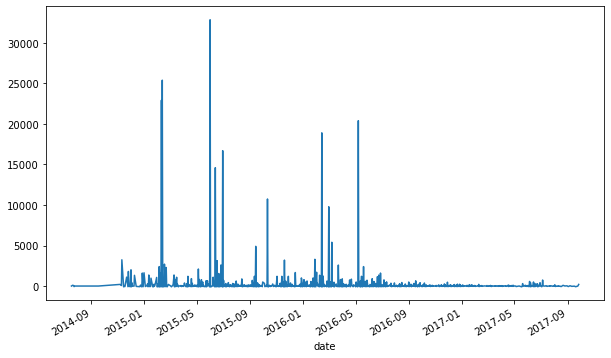

In [117]:
plt.figure(figsize=(10,6))
data.set_index('date')['pct_change'].plot()

In [121]:
pd.to_datetime(data[filt]['date'].values)

DatetimeIndex(['2015-06-16', '2015-12-07', '2016-02-01', '2016-03-01',
               '2016-03-03', '2016-03-11', '2016-05-03', '2016-05-26',
               '2016-06-20', '2016-07-15', '2016-07-21', '2016-08-17',
               '2016-09-01', '2016-10-07', '2016-11-08'],
              dtype='datetime64[ns]', freq=None)

In [122]:
data[filt]['Values'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

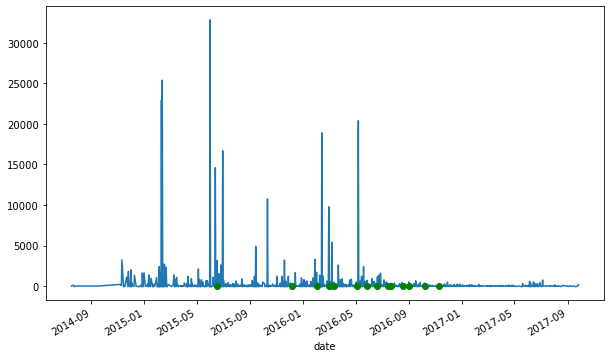

In [118]:
plt.figure(figsize=(10,6))
data.set_index('date')['pct_change'].plot()

plt.plot(pd.to_datetime(data[filt]['date'].values),data[filt]['Values'].values,c='g',marker='o',linestyle='None',label='Impt Dates in Election')

In [123]:
troll.to_csv(r'F:\Data Analysis\Updated Data\tweets_updated.csv',index=False)